<a href="https://colab.research.google.com/github/sightes/MGMODELOSAVANZADOS-METODOSNUMERICOS/blob/main/Regresion_ecuaciones_diferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
datos=pd.read_excel('datos.xlsx')

FileNotFoundError: ignored

<Axes: xlabel='tiempo'>

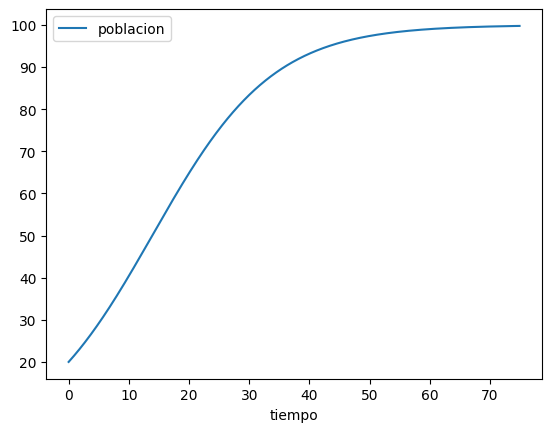

In [ ]:
datos.plot.line(x='tiempo',y='poblacion')

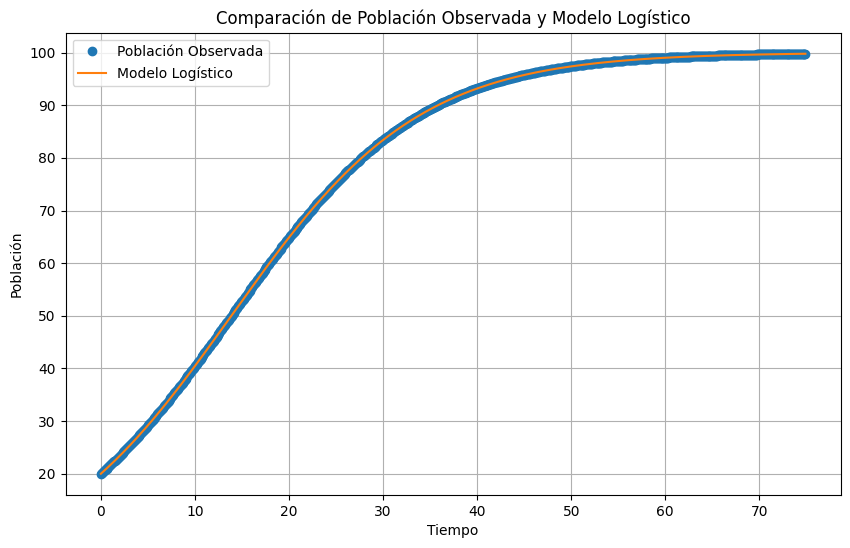

In [ ]:
tiempo = datos['tiempo'].to_numpy()
poblacion_observada = datos['poblacion'].to_numpy()

# Parámetros del Modelo Logístico (ajustar según sea necesario)

r = 0.1  # Tasa de crecimiento
K = 100   # Capacidad de carga
P0 = poblacion_observada[0]  # Población inicial basada en los datos

# Parámetros de la simulación
T = tiempo[-1]  # Tiempo total de simulación basado en los datos
dt = 0.001  # Paso de tiempo (ajustar según sea necesario)
n = int(T / dt)  # Número de pasos

# Inicialización para el Modelo Logístico
P = np.zeros(n)  # Vector para almacenar la población en cada paso
t_modelo = np.arange(0, T, dt)  # Vector de tiempo para el modelo
P[0] = P0  # Condición inicial

# Método de Euler para el Modelo Logístico
for i in range(n - 1):
    dP = r * P[i] * (1 - P[i] / K)  # Modelo logístico
    P[i + 1] = P[i] + dP * dt       # Método de Euler

# Visualización de los datos observados y el modelo
plt.figure(figsize=(10, 6))
plt.plot(tiempo, poblacion_observada, 'o', label='Población Observada')
plt.plot(t_modelo, P, label='Modelo Logístico')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Comparación de Población Observada y Modelo Logístico')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# leemos el archivo excel con la librerÃ­a pandas
datos = pd.read_excel('datos.xlsx')

# Asumiendo que el archivo tiene columnas 'tiempo' y 'poblacion'
tiempo = datos['tiempo'].to_numpy()
poblacion_observada = datos['poblacion'].to_numpy()


 # Tiempo total de simulación basado en los datos


# FunciÃ³n para el modelo logÃ­stico
def modelo_logistico(tiempo,P0, r, K):

  # Parámetros de la simulación
      T = tiempo[-1]
      dt = 0.001  # Paso de tiempo (ajustar según sea necesario)
      n = int(T / dt)  # Número de pasos
      P = np.zeros(n)  # Vector para almacenar la población en cada paso
      P[0] = P0  # Condición inicial
      # Método de Euler para el Modelo Logístico
      for i in range(n - 1):
          dP = r * P[i] * (1 - P[i] / K)  # Modelo logístico
          P[i + 1] = P[i] + dP * dt
      return(P)

estimacion_inicial = [P0, 0.3, 1000]  # [P0, r, K]

parametros_optimizados, covarianza = curve_fit(modelo_logistico, tiempo, poblacion_observada, p0=estimacion_inicial)

ValueError: ignored

In [ ]:
poblacion_observada[0]

20.0

In [ ]:

# Ajuste del modelo logÃ­stico a los datos
parametros_optimizados, covarianza = curve_fit(modelo_logistico, tiempo, poblacion_observada, p0=estimacion_inicial)

# ParÃ¡metros optimizados y sus errores estÃ¡ndar
P0_opt, r_opt, K_opt = parametros_optimizados
error_estandar = np.sqrt(np.diag(covarianza))

# Imprimir los resultados
print(f"ParÃ¡metros optimizados: P0 = {P0_opt:.2f}, r = {r_opt:.4f}, K = {K_opt:.2f}")
print(f"Errores estÃ¡ndar: P0 = {error_estandar[0]:.2f}, r = {error_estandar[1]:.4f}, K = {error_estandar[2]:.2f}")

# Usar los parÃ¡metros optimizados para predecir la poblaciÃ³n
poblacion_predicha = modelo_logistico(tiempo, P0_opt, r_opt, K_opt)

# VisualizaciÃ³n de los datos observados y el modelo
plt.figure(figsize=(10, 6))
plt.plot(tiempo, poblacion_observada, 'o', label='PoblaciÃ³n Observada')
plt.plot(tiempo, poblacion_predicha, label='Modelo LogÃ­stico Ajustado')
plt.xlabel('Tiempo')
plt.ylabel('PoblaciÃ³n')
plt.title('ComparaciÃ³n de PoblaciÃ³n Observada y Modelo LogÃ­stico Ajustado')
plt.legend()
plt.grid(True)
plt.show()